In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
filepath = "C:/Users/nisha/Nishant/Artificial Intelligence and Machine Learning/Datasets/ML Course/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv"


In [99]:
df = pd.read_csv(filepath)
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df = df.drop(columns='Position')
df

,00,Level,Salary
0,1,1,45000
1,1,2,50000
2,1,3,60000
3,1,4,80000
4,1,5,110000
5,1,6,150000
6,1,7,200000
7,1,8,300000
8,1,9,500000
9,1,10,1000000


In [100]:
y = df['Salary']
X = df.drop(columns = 'Salary')
#X['Level1'] = X['Level']**2
#X['Level2'] = X['Level']**3
order = 5

for i in range(order):
    X['Level'+str(i)] = X['Level']**i

x = X.iloc[:,:].values
y = y.values

print(x,y)


[[    1     1     1     1     1     1     1]
 [    1     2     1     2     4     8    16]
 [    1     3     1     3     9    27    81]
 [    1     4     1     4    16    64   256]
 [    1     5     1     5    25   125   625]
 [    1     6     1     6    36   216  1296]
 [    1     7     1     7    49   343  2401]
 [    1     8     1     8    64   512  4096]
 [    1     9     1     9    81   729  6561]
 [    1    10     1    10   100  1000 10000]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [101]:
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [102]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        #print(cost)
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [117]:

w, b, c= GradientDescent(x, y, np.zeros(x.shape[1]), 0, 0.00000005,epochs=50000)
#39966915.01000263 is lowest cost achieved

Cost is: 3471401218.284336
Cost is: 1805721787.8375528
Cost is: 1786265407.1826165
Cost is: 1777262003.5138965
Cost is: 1770475371.1682591
Cost is: 1764175106.2834535
Cost is: 1757997587.016744
Cost is: 1751866334.4536002
Cost is: 1745765194.9219365
Cost is: 1739690688.6387186


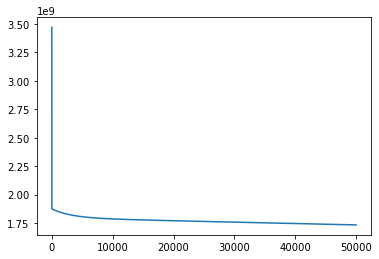

In [118]:
plt.plot(c)

In [119]:
def predict(X, w, b):
    return X.dot(w) + b

In [120]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [121]:
y_pred = predict(x, w, b)
r2 = r2score(y_pred, y)
print(r2)

0.9570147570647833


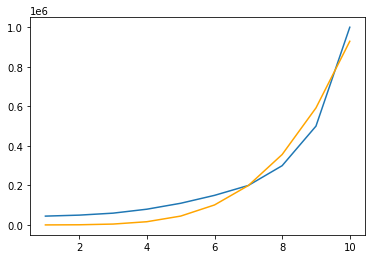

In [133]:
plt.plot(df['Level'],y)
plt.plot(df['Level'],y_pred,color ='orange')